# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from math import sqrt

# Load Data

In [6]:
pd.read_csv('Prod_Forecast.csv').head()

,Date,Well,Well_Type,WaterRate,CasingHeadPressure,TubingHeadPressure,PumpSpeed,Torque,GasRate
0,10-01-2015,Well 10,Pre-perf,192.00,51.00,38.00,63.00,235.00,2.00
1,11-01-2015,Well 10,Pre-perf,308.00,43.00,31.00,67.00,235.00,37.00
2,12-01-2015,Well 10,Pre-perf,308.00,41.00,31.00,67.00,239.00,59.00
3,13-01-2015,Well 10,Pre-perf,309.09,40.53,29.90,67.04,238.86,59.69
4,14-01-2015,Well 10,Pre-perf,308.18,40.46,29.84,67.06,236.16,56.57


# Pre-processing

## Parse date and set index to 'Date':

In [7]:
data = pd.read_csv('Prod_Forecast.csv', parse_dates=['Date'], index_col='Date', dayfirst=True)

In [8]:
data.head(10)

,Well,Well_Type,WaterRate,CasingHeadPressure,TubingHeadPressure,PumpSpeed,Torque,GasRate
Date,,,,,,,,
2015-01-10,Well 10,Pre-perf,192.00,51.00,38.00,63.00,235.00,2.00
2015-01-11,Well 10,Pre-perf,308.00,43.00,31.00,67.00,235.00,37.00
2015-01-12,Well 10,Pre-perf,308.00,41.00,31.00,67.00,239.00,59.00
2015-01-13,Well 10,Pre-perf,309.09,40.53,29.90,67.04,238.86,59.69
2015-01-14,Well 10,Pre-perf,308.18,40.46,29.84,67.06,236.16,56.57
2015-01-15,Well 10,Pre-perf,308.18,40.46,29.84,67.06,236.16,56.57
2015-01-16,Well 10,Pre-perf,306.29,40.25,29.69,67.03,236.27,51.80
2015-01-17,Well 10,Pre-perf,306.36,40.24,29.67,67.02,235.41,50.32
2015-01-18,Well 10,Pre-perf,306.14,40.42,29.81,67.04,236.80,54.30


## Sort according to 'Well' :

In [9]:
data = data.sort_values('Well')
data.head(10)

,Well,Well_Type,WaterRate,CasingHeadPressure,TubingHeadPressure,PumpSpeed,Torque,GasRate
Date,,,,,,,,
2018-07-12,Well 1,Pre-perf,26.31,47.86,47.85,109.0,118.01,143.45
2016-06-10,Well 1,Pre-perf,31.61,35.36,35.63,136.0,116.53,255.07
2016-06-11,Well 1,Pre-perf,32.60,35.41,35.69,136.0,117.27,255.80
2016-06-12,Well 1,Pre-perf,31.59,35.21,35.49,136.0,118.75,253.27
2016-06-13,Well 1,Pre-perf,31.79,35.27,35.55,136.0,118.01,251.73
2016-06-14,Well 1,Pre-perf,31.78,35.00,35.28,136.0,117.27,251.15
2016-06-15,Well 1,Pre-perf,31.70,35.21,35.48,136.0,118.01,250.82
2016-06-16,Well 1,Pre-perf,31.73,34.90,35.18,136.0,117.27,250.81
2016-06-17,Well 1,Pre-perf,31.59,34.89,35.17,135.0,118.01,249.90


## Drop unnescessary columns:

In [10]:
data.drop('Well_Type', axis = 1, inplace=True)

In [11]:
data.head()

,Well,WaterRate,CasingHeadPressure,TubingHeadPressure,PumpSpeed,Torque,GasRate
Date,,,,,,,
2018-07-12,Well 1,26.31,47.86,47.85,109.0,118.01,143.45
2016-06-10,Well 1,31.61,35.36,35.63,136.0,116.53,255.07
2016-06-11,Well 1,32.60,35.41,35.69,136.0,117.27,255.80
2016-06-12,Well 1,31.59,35.21,35.49,136.0,118.75,253.27
2016-06-13,Well 1,31.79,35.27,35.55,136.0,118.01,251.73


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10014 entries, 2018-07-12 to 2018-08-04
Data columns (total 7 columns):
Well                  10014 non-null object
WaterRate             10014 non-null float64
CasingHeadPressure    10014 non-null float64
TubingHeadPressure    10014 non-null float64
PumpSpeed             10014 non-null float64
Torque                10014 non-null float64
GasRate               10014 non-null float64
dtypes: float64(6), object(1)
memory usage: 625.9+ KB


In [13]:
data.describe()

,WaterRate,CasingHeadPressure,TubingHeadPressure,PumpSpeed,Torque,GasRate
count,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000,10014.000000
mean,255.401030,58.345532,57.180661,143.820432,246.935557,446.143849
std,186.126892,35.609559,20.591074,62.513463,115.562883,400.881072
min,0.000000,23.000000,0.040000,0.000000,0.010000,0.000000
25%,118.280000,42.060000,42.500000,100.000000,154.335000,171.482500
50%,221.490000,51.050000,53.850000,135.000000,242.660000,337.430000
75%,366.010000,61.350000,70.477500,188.000000,314.000000,548.610000
max,1184.130000,397.000000,387.000000,343.000000,753.000000,1867.940000


## Number of records in each well:

In [14]:
wellcount = data.Well.value_counts()
wellcount

Well 1     1359
Well 7     1230
Well 15    1220
Well 9     1199
Well 10    1078
Well 8     1052
Well 14     605
Well 12     384
Well 13     372
Well 6      358
Well 3      277
Well 2      277
Well 4      274
Well 5      168
Well 11     161
Name: Well, dtype: int64

### Prepare the training set:

In [15]:
df_train = data[data['Well'] != 'Well 14']

In [17]:
print(df_train.Well.unique())

['Well 1' 'Well 10' 'Well 11' 'Well 12' 'Well 13' 'Well 15' 'Well 2'
 'Well 3' 'Well 4' 'Well 5' 'Well 6' 'Well 7' 'Well 8' 'Well 9']


In [22]:
df_train.shape

(9409, 7)

### Prepare the blind set (Out of sample data) :

In [23]:
df_blind = data[data['Well'] == 'Well 14']

In [24]:
df_blind.head()

,Well,WaterRate,CasingHeadPressure,TubingHeadPressure,PumpSpeed,Torque,GasRate
Date,,,,,,,
2016-07-10,Well 14,505.59,64.60,65.66,220.0,342.23,1425.01
2016-07-11,Well 14,493.34,60.78,61.86,218.0,329.69,1432.29
2016-07-12,Well 14,493.34,60.78,61.86,214.0,327.48,1387.49
2016-07-13,Well 14,503.83,61.30,62.38,220.0,359.93,1361.19
2016-07-19,Well 14,495.14,63.64,64.63,219.0,345.18,1389.84


In [25]:
df_blind.shape

(605, 7)

### Slice train set into 'Input (X)' and 'Output (y)':

In [26]:
X  = df_train.iloc[:,1:6] # Input for Train data
y  = df_train.iloc[:,6:7]   # output for Train data

In [27]:
X.head()

,WaterRate,CasingHeadPressure,TubingHeadPressure,PumpSpeed,Torque
Date,,,,,
2018-07-12,26.31,47.86,47.85,109.0,118.01
2016-06-10,31.61,35.36,35.63,136.0,116.53
2016-06-11,32.60,35.41,35.69,136.0,117.27
2016-06-12,31.59,35.21,35.49,136.0,118.75
2016-06-13,31.79,35.27,35.55,136.0,118.01


In [28]:
y.head()

,GasRate
Date,
2018-07-12,143.45
2016-06-10,255.07
2016-06-11,255.80
2016-06-12,253.27
2016-06-13,251.73


### Convert training and blind dataframes to matrix form:

In [29]:
X  = X.as_matrix() 

C:\Users\H231148\AppData\Local\Continuum\anaconda3\envs\myenvSS\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [30]:
X

array([[ 26.31,  47.86,  47.85, 109.  , 118.01],
       [ 31.61,  35.36,  35.63, 136.  , 116.53],
       [ 32.6 ,  35.41,  35.69, 136.  , 117.27],
       ...,
       [236.33,  65.27,  65.85, 111.  , 224.96],
       [236.55,  65.27,  65.85, 110.  , 224.22],
       [ 20.  ,  50.  ,   3.  , 136.  , 246.  ]])

In [31]:
X.shape

(9409, 5)

In [32]:
y = y.as_matrix() # Train

C:\Users\H231148\AppData\Local\Continuum\anaconda3\envs\myenvSS\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [33]:
y

array([[143.45],
       [255.07],
       [255.8 ],
       ...,
       [110.43],
       [115.99],
       [135.  ]])

In [34]:
y.shape

(9409, 1)

### Slice blind set into 'Input (X_blind)' and 'Output (y_blind)':

In [35]:
X_blind  = df_blind.iloc[:,1:6] # Input for Train data
y_blind  = df_blind.iloc[:,6:7]   # output for Train data

In [36]:
X_blind  = X_blind.as_matrix() 

C:\Users\H231148\AppData\Local\Continuum\anaconda3\envs\myenvSS\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [37]:
X_blind

array([[505.59,  64.6 ,  65.66, 220.  , 342.23],
       [493.34,  60.78,  61.86, 218.  , 329.69],
       [493.34,  60.78,  61.86, 214.  , 327.48],
       ...,
       [520.51,  87.02,  89.34, 189.  , 313.  ],
       [519.76,  86.73,  89.05, 189.  , 315.  ],
       [524.35,  87.31,  89.63, 189.  , 304.  ]])

In [38]:
X_blind.shape

(605, 5)

In [39]:
y_blind = y_blind.as_matrix()

C:\Users\H231148\AppData\Local\Continuum\anaconda3\envs\myenvSS\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [46]:
print(y_blind)

[[1.42501e+03]
 [1.43229e+03]
 [1.38749e+03]
 [1.36119e+03]
 [1.38984e+03]
 [1.40128e+03]
 [1.34717e+03]
 [1.38752e+03]
 [1.42555e+03]
 [1.41961e+03]
 [1.43713e+03]
 [1.36784e+03]
 [1.32942e+03]
 [1.36749e+03]
 [1.37340e+03]
 [1.35985e+03]
 [1.40770e+03]
 [1.41470e+03]
 [1.33443e+03]
 [1.31973e+03]
 [1.32707e+03]
 [1.41039e+03]
 [1.39666e+03]
 [1.33209e+03]
 [1.36197e+03]
 [1.41899e+03]
 [1.38522e+03]
 [1.32898e+03]
 [1.42543e+03]
 [7.23390e+02]
 [1.41805e+03]
 [1.22889e+03]
 [1.16576e+03]
 [1.31364e+03]
 [1.31634e+03]
 [1.32691e+03]
 [1.32535e+03]
 [1.30789e+03]
 [1.30789e+03]
 [1.34103e+03]
 [1.34723e+03]
 [1.36170e+03]
 [1.37173e+03]
 [1.31035e+03]
 [1.31035e+03]
 [1.43442e+03]
 [1.42166e+03]
 [1.39990e+03]
 [1.35319e+03]
 [1.35319e+03]
 [1.29672e+03]
 [1.35836e+03]
 [1.43043e+03]
 [1.42693e+03]
 [1.40115e+03]
 [1.45603e+03]
 [1.52053e+03]
 [1.47715e+03]
 [1.46898e+03]
 [1.48724e+03]
 [1.49110e+03]
 [1.50359e+03]
 [1.50424e+03]
 [1.50266e+03]
 [1.49592e+03]
 [1.49776e+03]
 [1.49852e

In [47]:
y_blind.shape

(605, 1)

##  Normalization of the data:

In [48]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler()

### Normalize 'train set':

In [49]:
X_scale = std_scale.fit_transform(X)

### Normalize 'blind set':

In [50]:
X_blind_scale = std_scale.transform(X_blind)

# Modelling:

## Split the data into Training and Testing sets:

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale , y, test_size=0.33, random_state=42) 

## Define and Apply the MLP model:

In [52]:
# Initiate all the libraries required for this model
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import explained_variance_score
from sklearn.metrics import classification_report

In [53]:
# Define the model:
model = MLPRegressor(hidden_layer_sizes=(95,85,55,100,5), activation='relu', random_state=1)

In [54]:
# Apply model:
model.fit(X_train, y_train)

C:\Users\H231148\AppData\Local\Continuum\anaconda3\envs\myenvSS\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\H231148\AppData\Local\Continuum\anaconda3\envs\myenvSS\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 85, 55, 100, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

MLPRegressor :
    
    Multi-layer Perceptron i.e) Capability to learn non-linear models.
    
solver='adam':
    
    ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
    The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

activation='relu'
    
    ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

alpha=1e-5
    
    L2 penalty (regularization term) parameter.
    
hidden_layer_sizes :
    
    The Hidden layers apply given transformations to the input values inside the network.
    In this, incoming arcs that go from other hidden nodes or from input nodes connected to each node. It connects with outgoing arcs to output nodes or to other hidden nodes. 
    In hidden layer, the actual processing is done via a system of weighted ‘connections’.There may be one or more hidden layers. 
    The values entering a hidden node multiplied by weights, a set of predetermined numbers stored in the program. The weighted inputs are then added to produce a single number.
    

# Prediction

In [55]:
y_pred = model.predict(X_test)

# Model Evaluation of training set

In [56]:
print ('Explained_variance_score (r2 score) :', round(explained_variance_score(y_test,y_pred),2))

Explained_variance_score (r2 score) : 0.94


# Prediction on Blind set:

In [57]:
y_pred_blind = model.predict(X_blind_scale)

# Model Evaluation of Blind Set:

In [58]:
print ('Explained_variance_score (r2 score) :', round(explained_variance_score(y_blind,y_pred_blind),2))

Explained_variance_score (r2 score) : 0.72


# Data Visualisation

## Prepare the data for visualisation:

In [59]:
df_blind.insert(6, 'Predicted_Gas_rate', y_pred_blind)

In [60]:
df_blind.head()

,Well,WaterRate,CasingHeadPressure,TubingHeadPressure,PumpSpeed,Torque,Predicted_Gas_rate,GasRate
Date,,,,,,,,
2016-07-10,Well 14,505.59,64.60,65.66,220.0,342.23,1186.479608,1425.01
2016-07-11,Well 14,493.34,60.78,61.86,218.0,329.69,1236.746997,1432.29
2016-07-12,Well 14,493.34,60.78,61.86,214.0,327.48,1214.403066,1387.49
2016-07-13,Well 14,503.83,61.30,62.38,220.0,359.93,1186.867239,1361.19
2016-07-19,Well 14,495.14,63.64,64.63,219.0,345.18,1242.245125,1389.84


In [61]:
df_blind = df_blind.sort_index()

In [62]:
df_blind.head()

,Well,WaterRate,CasingHeadPressure,TubingHeadPressure,PumpSpeed,Torque,Predicted_Gas_rate,GasRate
Date,,,,,,,,
2014-12-08,Well 14,0.0,64.0,53.0,1.0,2.0,43.784697,14.0
2014-12-09,Well 14,592.0,65.0,66.0,77.0,216.0,55.014575,7.0
2014-12-10,Well 14,592.0,68.0,69.0,98.0,245.0,25.723199,20.0
2014-12-11,Well 14,592.0,70.0,70.0,98.0,238.0,18.934200,22.0
2014-12-12,Well 14,592.0,70.0,70.0,98.0,235.0,22.016792,17.0


# Visualisation:

## Create a function for plotting:

In [63]:
def plot_data(df,title=""):
    fig = plt.figure(figsize = (15,5))
    ax = fig.add_axes([0.1,0.1,1,1])
    ax.plot(df.index,df.GasRate)
    ax.plot(df.index,df.Predicted_Gas_rate)
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('GasRate')
    ax.set_title(title)

## Plot:

C:\Users\H231148\AppData\Local\Continuum\anaconda3\envs\myenvSS\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


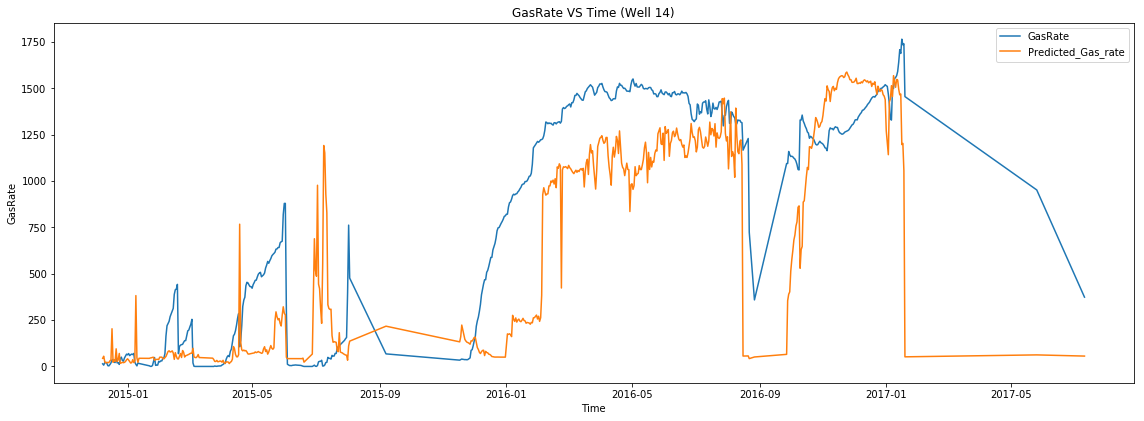

In [64]:
plot_data(df_blind, 'GasRate VS Time (Well 14)' )